In [1]:
from databaseCommunication import readDatabaseFile, createDataFrame_list
from dataframeFormating import createLabeledDataFrame_list #, N_polarized_pure3b, N_polarized, N_linear, getReducedDataframe, getReducedResults, 
from calculation import trapFrequency, getSubDF, noiseFilter, renameUnits, dropExcluded, computeBareTrapFrequencies, computeTrapFrequencies
from fit import fitDF, N_polarized_pure3b, N_polarized, N_linear, N_polarized_premix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from parameters import *

In [2]:
label_heads = ['isotope', 'run']


labels = [[['162', 'run1'], [183233, 183704]],  # look and remove a couple of shot under 34000 atom counts and below 1000ms hold
        #[['162', 'run2'], [183705, 183842]],
          [['162', 'run2'], [183863, 183970]],
          [['162', 'run3'], [184051, 184149]]
         ] # July 5th

# All is with 162 isotope

# run1 : -11.25 GHz, all power. 7.4+7.83
# run2 : -5.25 GHz, on low power and 2 high power. 7.4+7.83
# run3 (cut) : -20.25 GHz, all power. 7.4+7.83



compz_not_lossy = 7.4
compz_lossy = 7.83
compz_very_lossy = 7.85


excluded = [183419, 183620]

Over the course of one experiment, the PD reading basically varies +/-3% at high power (when the baseline is around 1V).

In [3]:
ciceroVariables = ['BECHoldTime', 'TOF', 'latticeDepth_final', 'latticeDetuning', 'compz_rotation', 'ODT3_Comp_final', 'ODT12_pre_lattice', 'ODT3_pre_lattice', 'dummy']
fitVariables = ['nCount', 'xWidth', 'yWidth', 'xPos', 'yPos']

df = createLabeledDataFrame_list(labels, label_heads, ciceroVariables, fitVariables)
for column in df.columns:
    try:
        df[column] = df[column].astype(float)
    except:
        pass
df.to_pickle('data_save_210705.pickle')

In [4]:
df = pd.read_pickle('data_save_210705.pickle')

#df_TOF = df_TOF[df_TOF['imageID'] < 169640]

#### Noise filtering
#df_TOF = noiseFilter(df_TOF, nMax = np.inf, nMin = 4000, xWidthMax = np.inf, yWidthMax = 100)
#df_TOF =  noiseFilter(df_TOF, nMax = np.inf, nMin = 4000, xWidthMax = 100, xWidthMin = 4,  yWidthMax = 100, yWidthMin = 4)

#df_TOF =  noiseFilter(df_TOF, nMax = np.inf, nMin = 3000, xWidthMax = 100, xWidthMin = 3,  yWidthMax = 100, yWidthMin = 3)
#df_TOF =  noiseFilter(df_TOF, nMax = np.inf, nMin = 6000, xWidthMax = 300, xWidthMin = 3,  yWidthMax = 300, yWidthMin = 3)



# add units and renames columns
# it add xWidth_um and the inversion between X and Y is performed
renameUnits(df, magnification = 4.38, cameraPixelSize = 6.5, axis = 'horizontal', experiment = 'TOF')

# Delete these row indexes from dataFrame
dropExcluded(df, excluded)

#wrongDetuningNames = pd.Index(np.where(df['imageID'].isin(list(range(181308, 181403+1))))[0])
#df.iloc[wrongDetuningNames, 3] = -5.25

df = df[df['BECHoldTime'] > 0]

In [5]:
computeBareTrapFrequencies(df)
#computeBareTrapFrequencies(df_inSitu, trapFrequency_x, trapFrequency_y, trapFrequency_z, trapFrequency_x_blue, trapFrequency_y_blue)

computeTrapFrequencies(df)
#computeTrapFrequencies(df_inSitu)

#temperature = 10*nK
#df_inSitu['rWidth_inSitu_v_um'] = np.sqrt(df_inSitu['xWidth_inSitu_v_um']*df_inSitu['yWidth_inSitu_v_um'])
#df_inSitu['rWidth_calculated_um'] = np.sqrt(k_B*temperature/(m*df_inSitu['trapFrequencyX_Hz']*df_inSitu['trapFrequencyY_Hz']))/um

In [6]:
df[df['nCount'] < 5000].iloc[:,:15]

,BECHoldTime,TOF,latticeDepth_mW,latticeDetuning_GHz,compz,ODT3_Comp_final,ODT12_pre_lattice,ODT3_pre_lattice,dummy,nCount,xWidth,yWidth,xPos,yPos,imageID
474,10.0,5.0,160.0,-5.25,7.83,5.0,0.5,0.5,2.0,782.0,3.82446,11.45740,1186.09,1544.31,183865.0
491,3.0,5.0,100.0,-5.25,7.83,5.0,0.5,0.5,2.0,4073.0,4.27390,147.75400,1161.87,1322.26,183882.0
504,2.0,5.0,160.0,-5.25,7.83,5.0,0.5,0.5,2.0,933.0,60.68100,126.66700,1099.97,1588.20,183895.0
516,3.0,5.0,160.0,-5.25,7.83,5.0,0.5,0.5,2.0,3686.0,35.07670,44.49610,1071.83,1456.70,183907.0
518,10.0,5.0,160.0,-5.25,7.83,5.0,0.5,0.5,1.0,4460.0,305.55500,21.35270,1447.45,1452.09,183909.0
524,5.0,5.0,160.0,-5.25,7.83,5.0,0.5,0.5,2.0,4203.0,38.14430,140.25500,1077.11,1602.40,183915.0
538,20.0,5.0,160.0,-5.25,7.83,5.0,0.5,0.5,1.0,3965.0,272.02800,11.44190,1384.88,1505.79,183929.0
539,20.0,5.0,160.0,-5.25,7.83,5.0,0.5,0.5,2.0,4873.0,189.81500,63.59190,1242.77,1490.60,183930.0
549,10.0,5.0,100.0,-5.25,7.83,5.0,0.5,0.5,1.0,3644.0,243.02200,1.26164,1316.29,1459.01,183940.0


In [7]:
getSubDF(df,['latticeDetuning_GHz', 'latticeDepth_mW', 'compz'], [-11.25, 160, 7.4]).head()

,BECHoldTime,TOF,latticeDepth_mW,latticeDetuning_GHz,compz,ODT3_Comp_final,ODT12_pre_lattice,ODT3_pre_lattice,dummy,nCount,...,run,xWidth_TOF_h_um,zWidth_TOF_h_um,trapFrequencyZ_kHz,deconfiningTrapFrequency_Hz,bareTrapFrequencyX_Hz,bareTrapFrequencyY_Hz,bareTrapFrequencyZ_Hz,trapFrequencyX_Hz,trapFrequencyY_Hz
0,3000.0,5.0,160.0,-11.25,7.4,5.0,0.5,0.5,3.0,21205.0,...,run1,57.862763,41.938059,74.277045,41.154721,330.0,208.0,235.0,407.810955,317.29131
1,50.0,5.0,160.0,-11.25,7.4,5.0,0.5,0.5,2.0,43585.0,...,run1,43.307066,36.971644,74.277045,41.154721,330.0,208.0,235.0,407.810955,317.29131
2,5000.0,5.0,160.0,-11.25,7.4,5.0,0.5,0.5,2.0,19550.0,...,run1,64.762260,43.607580,74.277045,41.154721,330.0,208.0,235.0,407.810955,317.29131
3,200.0,5.0,160.0,-11.25,7.4,5.0,0.5,0.5,3.0,34892.0,...,run1,47.028687,35.393539,74.277045,41.154721,330.0,208.0,235.0,407.810955,317.29131
4,5000.0,5.0,160.0,-11.25,7.4,5.0,0.5,0.5,1.0,14080.0,...,run1,67.277671,50.041986,74.277045,41.154721,330.0,208.0,235.0,407.810955,317.29131


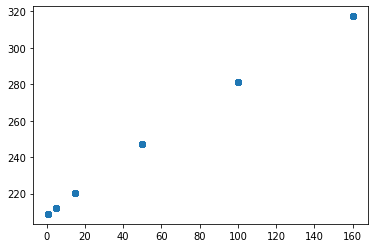

In [8]:
plt.figure()
df_temp = getSubDF(df, ['latticeDetuning_GHz'], [-11.25])
plt.plot(df_temp['latticeDepth_mW'], df_temp['trapFrequencyY_Hz'], 'o')
plt.show()

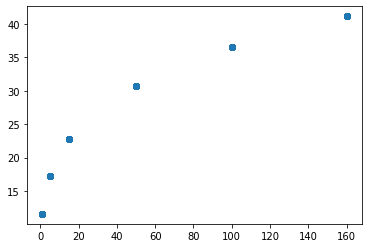

In [9]:
plt.figure()
df_temp = getSubDF(df, ['latticeDetuning_GHz'], [-11.25])
plt.plot(df_temp['latticeDepth_mW'], df_temp['deconfiningTrapFrequency_Hz'], 'o')
plt.show()

I computed that for a blue lattice $\omega_\perp^2 = \frac{\hbar k\sqrt{2V_{741}}}{m^{3/2}w_{741}^2} = \frac{\hbar k\sqrt{2\frac{m\omega_z^2}{2k^2}}}{m^{3/2}w_{741}^2} = \frac{\hbar\omega_z}{m w_{741}^2}$.

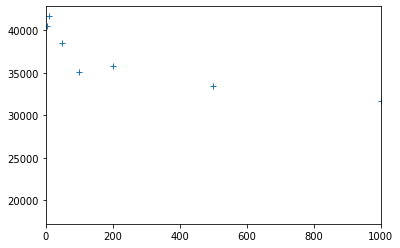

In [10]:
df_temp = getSubDF(df, ['latticeDetuning_GHz', 'latticeDepth_mW', 'compz'], [-11.25, 160, compz_not_lossy]).groupby(['BECHoldTime']).mean().reset_index()
plt.figure()
plt.plot(df_temp['BECHoldTime'], df_temp['nCount'], '+')
plt.xlim(0,1000)
plt.show()

In [11]:
df.columns

Index(['BECHoldTime', 'TOF', 'latticeDepth_mW', 'latticeDetuning_GHz', 'compz',
       'ODT3_Comp_final', 'ODT12_pre_lattice', 'ODT3_pre_lattice', 'dummy',
       'nCount', 'xWidth', 'yWidth', 'xPos', 'yPos', 'imageID', 'isotope',
       'run', 'xWidth_TOF_h_um', 'zWidth_TOF_h_um', 'trapFrequencyZ_kHz',
       'deconfiningTrapFrequency_Hz', 'bareTrapFrequencyX_Hz',
       'bareTrapFrequencyY_Hz', 'bareTrapFrequencyZ_Hz', 'trapFrequencyX_Hz',
       'trapFrequencyY_Hz'],
      dtype='object')

In [12]:
latticeDepthList = np.sort(df['latticeDepth_mW'].unique())
BECHoldTimeList = np.sort(df['BECHoldTime'].unique())
latticeDetuningList = np.sort(df['latticeDetuning_GHz'].unique())
compzList = np.sort(df['compz'].unique())
ODT3_Comp_finalList = np.sort(df['ODT3_Comp_final'].unique())
trapFrequencyList = np.sort(df['trapFrequencyZ_kHz'].unique())


"""latticeDepthList = np.sort(df['latticeDepth'].unique())
BECHoldTimeList = np.sort(df['BECHoldTime'].unique())
latticeDetuningList = np.sort(df['latticeDetuning'].unique())
compzList = np.sort(df['compz'].unique())
ODTFactorList = np.sort(df['ODTFactor'].unique())"""
colors = ['red', 'blue', 'orange', 'black', 'green', 'pink', 'purple']

In [13]:
latticeDepthList

array([  1.,   5.,  15.,  50., 100., 160.])

# Old stuff

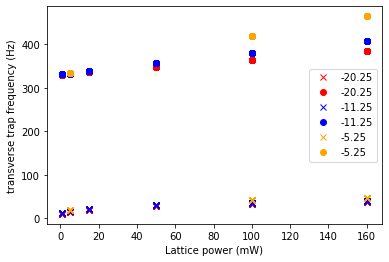

In [14]:
plt.figure()
i = 0
for latticeDetuning in latticeDetuningList:
    df_temp = getSubDF(df, ['latticeDetuning_GHz'], [latticeDetuning])
    plt.plot(df_temp['latticeDepth_mW'], df_temp['deconfiningTrapFrequency_Hz'], 'x', color = colors[i], label = latticeDetuning)
    plt.plot(df_temp['latticeDepth_mW'], df_temp['trapFrequencyX_Hz'], 'o', color = colors[i], label = latticeDetuning)
    i += 1
plt.legend()
plt.xlabel('Lattice power (mW)')
plt.ylabel('transverse trap frequency (Hz)')
plt.show()

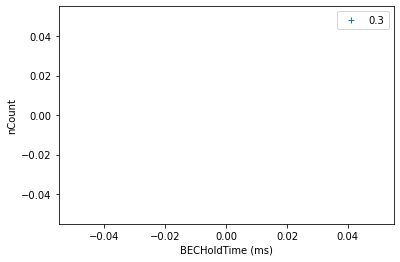

In [15]:
latticeDetuning = -11.25
compz = 7.4
plt.figure()
for latticeDepth in [0.3]:#, 20, 120]:
    df_temp = getSubDF(df, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz'], [latticeDepth, latticeDetuning, compz])
    plt.plot(df_temp['BECHoldTime'], df_temp['nCount'], '+', label = str(round(latticeDepth, 2)))
plt.legend()
#plt.ylim(0, 5000)
#plt.ylim(0,50000)
plt.xlabel('BECHoldTime (ms)')
plt.ylabel('nCount')
plt.show()

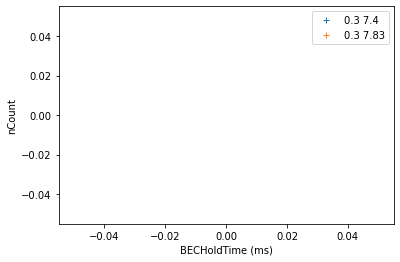

In [16]:
latticeDetuning = -11.25
plt.figure()
for latticeDepth in [0.3]:#, 20, 120]:
    df_temp_1 = getSubDF(df, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz'], [latticeDepth, latticeDetuning, compz_not_lossy])
    df_temp_2 = getSubDF(df, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz'], [latticeDepth, latticeDetuning, compz_lossy])
    plt.plot(df_temp_1['BECHoldTime'], df_temp_1['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' +str(compz_not_lossy))
    plt.plot(df_temp_2['BECHoldTime'], df_temp_2['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' +str(compz_lossy))
plt.legend()
#plt.ylim(0, 5000)
#plt.xlim(0,10)
plt.xlabel('BECHoldTime (ms)')
plt.ylabel('nCount')
plt.show()

In [17]:
resultsDF_pure = fitDF(df, ['latticeDetuning_GHz', 'latticeDepth_mW', 'compz'], fitType = 'pure')
resultsDF_pure.drop(columns = ['BECHoldTime', 'xWidth', 'yWidth', 'imageID', 'dummy'], inplace = True)
resultsDF_pure['compz'] = resultsDF_pure['compz'].round(3)

resultsDF_pure_premix = fitDF(df, ['latticeDetuning_GHz', 'latticeDepth_mW', 'compz'], fitType = 'pure_premix')
resultsDF_pure_premix.drop(columns = ['BECHoldTime', 'xWidth', 'yWidth', 'imageID', 'dummy'], inplace = True)
resultsDF_pure_premix['compz'] = resultsDF_pure['compz'].round(3)

resultsDF_mix = fitDF(df, ['latticeDetuning_GHz', 'latticeDepth_mW', 'compz'], fitType = 'mix')
resultsDF_mix.drop(columns = ['BECHoldTime', 'xWidth', 'yWidth', 'imageID', 'dummy'], inplace = True)
resultsDF_mix['compz'] = resultsDF_mix['compz'].round(3)

resultsDF_lin = fitDF(df, ['latticeDetuning_GHz', 'latticeDepth_mW', 'compz'], fitType = 'lin', tmax_ms = 201)
resultsDF_lin.drop(columns = ['BECHoldTime', 'xWidth', 'yWidth', 'imageID', 'dummy'], inplace = True)
resultsDF_lin['compz'] = resultsDF_lin['compz'].round(3)






"""def N_polarized(t, N0, alpha, gamma):
    return np.sqrt(alpha / (np.exp(2*alpha*t)*(alpha/(N0**2)+gamma)-gamma))

def N_linear(t, N0, b):
    return N0-b*t

def N_polarized_pure3b(t, N0, gamma):
    return N0 / np.sqrt(1+N0**2*gamma*t)"""


#print('\n')
#print(resultsDF)
#perr = np.sqrt(np.diag(pcov))

{'BECHoldTime': 77.16666666666667, 'TOF': 5.0, 'latticeDepth_mW': 1.0, 'latticeDetuning_GHz': -20.25, 'compz': 7.3999999999999995, 'ODT3_Comp_final': 5.0, 'ODT12_pre_lattice': 0.5, 'ODT3_pre_lattice': 0.5, 'dummy': 1.6666666666666667, 'nCount': 30285.333333333332, 'xWidth': 20.459233333333334, 'yWidth': 20.816933333333335, 'xPos': 1082.3683333333333, 'yPos': 1474.6816666666666, 'imageID': 184091.83333333334, 'isotope': 162.0, 'xWidth_TOF_h_um': 30.361875951293765, 'zWidth_TOF_h_um': 30.89270928462709, 'trapFrequencyZ_kHz': 4.794082756953376, 'deconfiningTrapFrequency_Hz': 10.455507524312418, 'bareTrapFrequencyX_Hz': 329.99999999999994, 'bareTrapFrequencyY_Hz': 208.00000000000003, 'bareTrapFrequencyZ_Hz': 235.0, 'trapFrequencyX_Hz': 330.3621641712717, 'trapFrequencyY_Hz': 208.57411036829646}
{'BECHoldTime': 641.6, 'TOF': 5.0, 'latticeDepth_mW': 5.0, 'latticeDetuning_GHz': -20.25, 'compz': 7.400000000000001, 'ODT3_Comp_final': 5.0, 'ODT12_pre_lattice': 0.5, 'ODT3_pre_lattice': 0.5, 'dumm

{'BECHoldTime': 12.555555555555555, 'TOF': 5.0, 'latticeDepth_mW': 100.0, 'latticeDetuning_GHz': -5.25, 'compz': 7.400000000000001, 'ODT3_Comp_final': 5.0, 'ODT12_pre_lattice': 0.5, 'ODT3_pre_lattice': 0.5, 'dummy': 1.5, 'nCount': 28402.555555555555, 'xWidth': 45.59272777777778, 'yWidth': 31.519377777777784, 'xPos': 1082.591111111111, 'yPos': 1473.4327777777778, 'imageID': 183922.77777777778, 'isotope': 162.0, 'xWidth_TOF_h_um': 67.6604407661086, 'zWidth_TOF_h_um': 46.775332318619995, 'trapFrequencyZ_kHz': 80.03084458493953, 'deconfiningTrapFrequency_Hz': 42.71899781532373, 'bareTrapFrequencyX_Hz': 329.99999999999994, 'bareTrapFrequencyY_Hz': 208.00000000000003, 'bareTrapFrequencyZ_Hz': 235.0, 'trapFrequencyX_Hz': 418.9852724530508, 'trapFrequencyY_Hz': 331.5307806713536}
{'BECHoldTime': 12.555555555555555, 'TOF': 5.0, 'latticeDepth_mW': 160.0, 'latticeDetuning_GHz': -5.25, 'compz': 7.400000000000001, 'ODT3_Comp_final': 5.0, 'ODT12_pre_lattice': 0.5, 'ODT3_pre_lattice': 0.5, 'dummy': 1

{'BECHoldTime': 132.12121212121212, 'TOF': 5.0, 'latticeDepth_mW': 50.0, 'latticeDetuning_GHz': -11.25, 'compz': 7.829999999999999, 'ODT3_Comp_final': 5.0, 'ODT12_pre_lattice': 0.5, 'ODT3_pre_lattice': 0.5, 'dummy': 2.515151515151515, 'nCount': 25441.333333333332, 'xWidth': 28.03730909090909, 'yWidth': 25.41055757575758, 'xPos': 1084.610909090909, 'yPos': 1473.9336363636364, 'imageID': 183446.30303030304, 'isotope': 162.0, 'xWidth_TOF_h_um': 41.60787878787879, 'zWidth_TOF_h_um': 37.70973156219732, 'trapFrequencyZ_kHz': 41.522130402902754, 'deconfiningTrapFrequency_Hz': 30.770331109644115, 'bareTrapFrequencyX_Hz': 329.99999999999994, 'bareTrapFrequencyY_Hz': 208.00000000000003, 'bareTrapFrequencyZ_Hz': 235.0, 'trapFrequencyX_Hz': 356.14681631021904, 'trapFrequencyY_Hz': 247.3955431447885}
{'BECHoldTime': 124.85714285714286, 'TOF': 5.0, 'latticeDepth_mW': 100.0, 'latticeDetuning_GHz': -11.25, 'compz': 7.829999999999998, 'ODT3_Comp_final': 5.0, 'ODT12_pre_lattice': 0.5, 'ODT3_pre_lattice'

/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:274: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:274: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


'def N_polarized(t, N0, alpha, gamma):\n    return np.sqrt(alpha / (np.exp(2*alpha*t)*(alpha/(N0**2)+gamma)-gamma))\n\ndef N_linear(t, N0, b):\n    return N0-b*t\n\ndef N_polarized_pure3b(t, N0, gamma):\n    return N0 / np.sqrt(1+N0**2*gamma*t)'

In [18]:
resultsDF_pure_premix

,N0,alpha,gamma,b,TOF,latticeDepth_mW,latticeDetuning_GHz,compz,ODT3_Comp_final,ODT12_pre_lattice,...,isotope,xWidth_TOF_h_um,zWidth_TOF_h_um,trapFrequencyZ_kHz,deconfiningTrapFrequency_Hz,bareTrapFrequencyX_Hz,bareTrapFrequencyY_Hz,bareTrapFrequencyZ_Hz,trapFrequencyX_Hz,trapFrequencyY_Hz
0,29687.616430,0.000031,-3.149220e-13,NaN,5.0,1.0,-20.25,7.40,5.0,0.5,...,162.0,30.361876,30.892709,4.794083,10.455508,330.0,208.0,235.0,330.362164,208.574110
1,30073.228801,0.000031,2.795860e-14,NaN,5.0,5.0,-20.25,7.40,5.0,0.5,...,162.0,36.348668,33.882437,10.719895,15.634630,330.0,208.0,235.0,331.806868,210.854921
2,34117.386159,0.000031,2.362735e-13,NaN,5.0,15.0,-20.25,7.40,5.0,0.5,...,162.0,38.251270,29.993472,18.567403,20.576331,330.0,208.0,235.0,335.391402,216.451825
3,28812.619872,0.000031,3.863746e-14,NaN,5.0,50.0,-20.25,7.40,5.0,0.5,...,162.0,40.977158,32.005228,33.899284,27.802741,330.0,208.0,235.0,347.646337,234.993565
4,31188.513691,0.000031,2.752781e-13,NaN,5.0,100.0,-20.25,7.40,5.0,0.5,...,162.0,48.618757,33.001561,47.940828,33.063218,330.0,208.0,235.0,364.439229,259.190956
5,27496.075504,0.000031,4.114984e-13,NaN,5.0,160.0,-20.25,7.40,5.0,0.5,...,162.0,49.773125,36.209007,60.640883,37.185628,330.0,208.0,235.0,383.621588,285.533750
6,40362.730109,0.000031,1.753617e-14,NaN,5.0,1.0,-11.25,7.40,5.0,0.5,...,162.0,32.188472,32.639498,5.872116,11.571500,330.0,208.0,235.0,330.543206,208.860746
7,40428.325810,0.000031,2.794816e-14,NaN,5.0,5.0,-11.25,7.40,5.0,0.5,...,162.0,35.425037,35.290482,13.130451,17.303429,330.0,208.0,235.0,332.707162,212.268828
8,41538.160635,0.000031,8.541070e-14,NaN,5.0,15.0,-11.25,7.40,5.0,0.5,...,162.0,38.427514,37.369390,22.742607,22.772593,330.0,208.0,235.0,338.056455,220.558760
9,39331.181490,0.000031,8.739674e-14,NaN,5.0,50.0,-11.25,7.40,5.0,0.5,...,162.0,41.243845,38.815541,41.522130,30.770331,330.0,208.0,235.0,356.146816,247.395543


In [19]:
latticeDepth = 1
latticeDetuning = -11.25
compz = compz_not_lossy
df_tempZ = getSubDF(df, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz'], [latticeDepth, latticeDetuning, compz])
time = np.linspace(0, 3000, 10000)

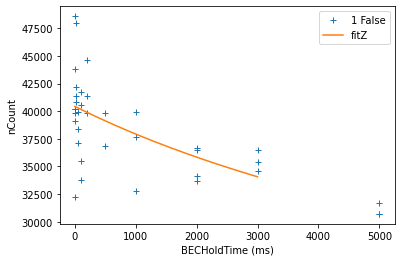

In [20]:
resultZ = getSubDF(resultsDF_pure, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz'], [latticeDepth, latticeDetuning, compz])

NZ, gammaZ = resultZ[['N0', 'gamma']].iloc[0,:]
Z = N_polarized_pure3b(time, NZ, gammaZ)

plt.figure()
plt.plot(df_tempZ['BECHoldTime'], df_tempZ['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(False))
plt.plot(time, Z, '-', label = 'fitZ')
plt.legend()
#plt.ylim(0, 20000)
#plt.xlim(0,10)
plt.xlabel('BECHoldTime (ms)')
plt.ylabel('nCount')
plt.show()

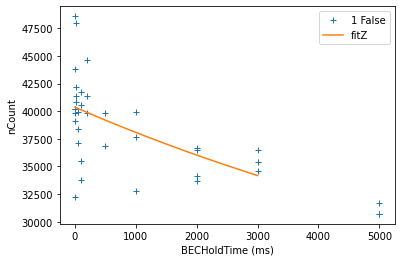

In [21]:
resultZ = getSubDF(resultsDF_pure_premix, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz'], [latticeDepth, latticeDetuning, compz])

NZ, gammaZ = resultZ[['N0', 'gamma']].iloc[0,:]
Z = N_polarized_premix(time, NZ, gammaZ)

plt.figure()
plt.plot(df_tempZ['BECHoldTime'], df_tempZ['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(False))
plt.plot(time, Z, '-', label = 'fitZ')
plt.legend()
#plt.ylim(0, 20000)
#plt.xlim(0,10)
plt.xlabel('BECHoldTime (ms)')
plt.ylabel('nCount')
plt.show()

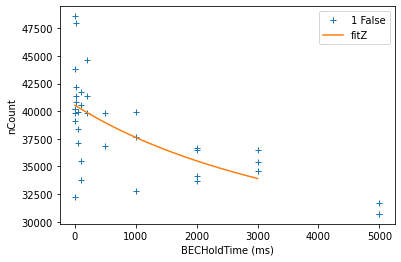

In [22]:
resultZ = getSubDF(resultsDF_mix, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz'], [latticeDepth, latticeDetuning, compz])

NZ, alphaZ, gammaZ = resultZ[['N0', 'alpha', 'gamma']].iloc[0,:]

Z = N_polarized(time, NZ, alphaZ, gammaZ)

plt.figure()
plt.plot(df_tempZ['BECHoldTime'], df_tempZ['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(False))
plt.plot(time, Z, '-', label = 'fitZ')
plt.legend()
#plt.ylim(0,20000)
#plt.xlim(0,10)
plt.xlabel('BECHoldTime (ms)')
plt.ylabel('nCount')
plt.show()

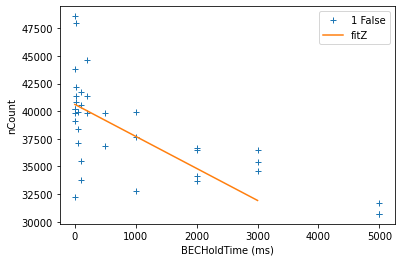

In [23]:
resultZ = getSubDF(resultsDF_lin, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz'], [latticeDepth, latticeDetuning, compz])

NZ, bZ = resultZ[['N0', 'b']].iloc[0,:]

Z = N_linear(time, NZ, bZ)

plt.figure()
plt.plot(df_tempZ['BECHoldTime'], df_tempZ['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(False))
plt.plot(time, Z, '-', label = 'fitZ')
plt.legend()
#plt.ylim(0,30000)
#plt.xlim(0,100)
plt.xlabel('BECHoldTime (ms)')
plt.ylabel('nCount')
plt.show()

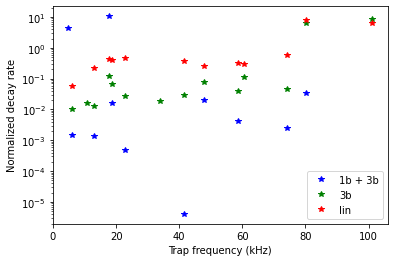

In [24]:
resultsDF_notLossy = getSubDF(resultsDF_mix, ['compz'], [compz])
resultsDF_notLossy_pure = getSubDF(resultsDF_pure, ['compz'], [compz])
resultsDF_notLossy_lin = getSubDF(resultsDF_lin, ['compz'], [compz])

#latticePower = -resultsDF_Z['latticeDepth']/resultsDF_Z['latticeDetuning']
trapFrequencyList = resultsDF_notLossy['trapFrequencyZ_kHz']
decay_1b3b = resultsDF_notLossy['gamma']/resultsDF_notLossy['gamma'].mean()
decay_3b = resultsDF_notLossy_pure['gamma']/resultsDF_notLossy_pure['gamma'].mean()
decay_lin = resultsDF_notLossy_lin['b']/resultsDF_notLossy_lin['b'].mean()

plt.figure()
plt.semilogy(trapFrequencyList, decay_1b3b, 'b*', label = '1b + 3b')
plt.semilogy(trapFrequencyList, decay_3b, 'g*', label = '3b')
plt.semilogy(trapFrequencyList, decay_lin, 'r*', label = 'lin')
plt.xlabel("Trap frequency (kHz)")
plt.ylabel("Normalized decay rate")


plt.legend()
#plt.ylim(0,0.2*10**(-11))
plt.show()

The increase in power should result in a smaller cloud. The density is proportional to $n\sim 1/(a_{oh}r_{\perp}^{2}) \sim \sqrt{\omega_{z}}\frac{\omega_{\perp}^{2}}{\mu}$. Assuming the chemical potential constant, the density $n$ goes like $(P/\Delta)^{5/4}$. In that case the decay coefficient which is proportional to $n^{2}$ should be scalled accordingly.
If we rather fix the scattering length $a$ and write $\mu\sim na$ then at constant $a$ it gives $n \sim (P/\Delta)^{5/8})$.

And $P/\Delta \propto \omega_{z}^{2}$

Note for a thermal cloud that gets compressed from $\omega_i$ to $\omega_f = k\omega_i$. $E_i = \sum \epsilon_i p_i$ and $E_f = \sum \epsilon_f p_f = \sum (k\epsilon_i) p_i = kE_i$. So the temperature goes like $T_f = kT_i$. But the probability to occupy each state remains the same, so $\omega^2 \Delta x^2/T = $ cste. There for $\Delta x_f = \Delta x_i/\sqrt{k}$. So a good proxy for the density is $n \propto 1/(a_z r^2) \propto \omega_z^{1/2} \sqrt{k}^{2} \propto \omega_z^{3/2}$. Or if we want to be more precise and take into consideration the ODT trapping, one should say $n \propto \omega_z^{1/2}\omega_{\perp,1}^{1/2}\omega_{\perp,2}^{1/2}$

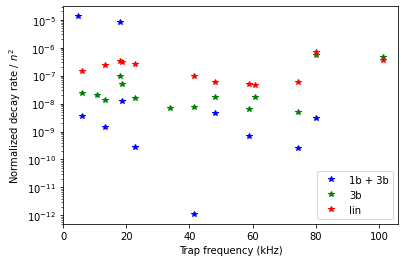

In [25]:
powerExponent = 3/2
# 3/2 for 2D thermal + 1D HO
# 5/2 for 2D BEC fixed chemical potential (wrong) + 1D HO
# 5/4 for 2D BEC fixed scattering length + 1D HO

trapFrequencyList = resultsDF_notLossy['trapFrequencyZ_kHz']
decay_1b3b = resultsDF_notLossy['gamma']/resultsDF_notLossy['gamma'].mean()/(trapFrequencyList**2)**(powerExponent)
decay_3b = resultsDF_notLossy_pure['gamma']/resultsDF_notLossy_pure['gamma'].mean()/(trapFrequencyList**2)**(powerExponent)
decay_lin = resultsDF_notLossy_lin['b']/resultsDF_notLossy_lin['b'].mean()/(trapFrequencyList**2)**(powerExponent)
### That was the previous scaling before we changed to take into account the ODT trapping

### Now it is simple n^2 \propto omega_z * omega_perp1^2 * omega_perp2^2
trapFrequencyList = resultsDF_notLossy['trapFrequencyZ_kHz']
trapFrequencyPerp1List = resultsDF_notLossy['trapFrequencyX_Hz']
trapFrequencyPerp2List = resultsDF_notLossy['trapFrequencyY_Hz']
decay_1b3b = resultsDF_notLossy['gamma']/resultsDF_notLossy['gamma'].mean()/(trapFrequencyList*trapFrequencyPerp1List*trapFrequencyPerp2List)
decay_3b = resultsDF_notLossy_pure['gamma']/resultsDF_notLossy_pure['gamma'].mean()/(trapFrequencyList*trapFrequencyPerp1List*trapFrequencyPerp2List)
decay_lin = resultsDF_notLossy_lin['b']/resultsDF_notLossy_lin['b'].mean()/(trapFrequencyList*trapFrequencyPerp1List*trapFrequencyPerp2List)


plt.figure()
plt.semilogy(trapFrequencyList, decay_1b3b, 'b*', label = '1b + 3b')
plt.semilogy(trapFrequencyList, decay_3b, 'g*', label = '3b')
plt.semilogy(trapFrequencyList, decay_lin, 'r*', label = 'lin')

plt.xlabel("Trap frequency (kHz)")
plt.ylabel("Normalized decay rate / $n^2$")
plt.legend()
#plt.ylim(0,0.2*10**(-11))
plt.show()

Let's use only the pure 3b fit

In [26]:
#results = resultsDF_pure_premix
results = resultsDF_pure
#results = resultsDF_lin

In [27]:
latticeDepthList = np.sort(df['latticeDepth_mW'].unique())
BECHoldTimeList = np.sort(df['BECHoldTime'].unique())
latticeDetuningList = np.sort(df['latticeDetuning_GHz'].unique())
compzList = np.sort(df['compz'].unique())

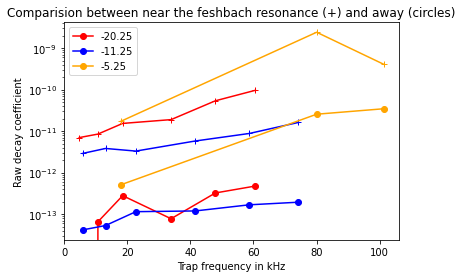

In [28]:
plt.figure()
i = 0
for latticeDetuning in latticeDetuningList:
    decay_notlossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_not_lossy])
    decay_lossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_lossy])
    plt.semilogy(decay_notlossy['trapFrequencyZ_kHz'], decay_notlossy['gamma'], color = colors[i], marker = 'o', label = latticeDetuning)
    plt.semilogy(decay_lossy['trapFrequencyZ_kHz'], decay_lossy['gamma'], color = colors[i], marker = '+')
    i += 1
plt.legend()
#plt.xlim(0,20)
plt.xlabel('Trap frequency in kHz')
plt.ylabel('Raw decay coefficient')
plt.title('Comparision between near the feshbach resonance (+) and away (circles)')
plt.show()

The average xWidth of the cloud is 4.36 pixel and yWidth is 4.45, each are 6.5 micro meters big and magnification is 4. It makes 7 micrometers cloud size (one sigma), so approximately 40 pancakes filled.

The nCount of the previous data was accounting a 3.45 micro meters pixel and 1 magnification, this should be corrected accordingly

For the temperature : $\sigma = \sqrt{\sigma_0^{2}+(\sigma_v\tau)^2}$ with $\sigma_{0} = 7 \mu m$ and $\tau$ the time of flight. And $\sigma_{v} = \sqrt{\frac{k_{B}T}{m}}$ so $T = \frac{m}{k_{B}}\frac{\sigma^2-\sigma^2_0}{\tau^2}$

In [29]:
getSubDF(df, ['latticeDetuning_GHz', 'latticeDepth_mW', 'BECHoldTime'], [-11.25, 160, 0]).iloc[:,10:]

,xWidth,yWidth,xPos,yPos,imageID,isotope,run,xWidth_TOF_h_um,zWidth_TOF_h_um,trapFrequencyZ_kHz,deconfiningTrapFrequency_Hz,bareTrapFrequencyX_Hz,bareTrapFrequencyY_Hz,bareTrapFrequencyZ_Hz,trapFrequencyX_Hz,trapFrequencyY_Hz


In [30]:
#sigma_0_um = 7
sigma_0_um = 0

#df['temperature'] = (m/k_B*((df['xWidth_TOF_h_um']*um)**2-(df['xWidth_inSitu_v_um']*um)**2)/((df['TOF']*ms)**2))/nK # in nano kelvin
# if you use xWidth_inSitu_v_um there is nothing for red detuned runs

df['temperature_nK'] = (m/k_B*((df['xWidth_TOF_h_um']*um)**2-(sigma_0_um*um)**2)/((df['TOF']*ms)**2))/nK # in nano kelvin
df[['xWidth', 'xWidth_TOF_h_um','temperature_nK']]

,xWidth,xWidth_TOF_h_um,temperature_nK
0,26.2005,38.882021,1192.283126
1,18.2307,27.054692,577.253969
2,30.0751,44.631998,1570.993540
3,23.2735,34.538299,940.770387
5,29.7682,44.176553,1539.094863
...,...,...,...
673,28.2888,41.981096,1389.918353
674,25.5750,37.953767,1136.034508
675,19.2232,28.527580,641.817579
676,21.6495,32.128253,814.059184


In [31]:
BECHoldTimeList

array([1.0e+00, 2.0e+00, 3.0e+00, 5.0e+00, 7.0e+00, 1.0e+01, 1.5e+01,
       2.0e+01, 3.0e+01, 5.0e+01, 1.0e+02, 2.0e+02, 3.0e+02, 5.0e+02,
       1.0e+03, 2.0e+03, 3.0e+03, 5.0e+03])

In [61]:
# Time at which you compute the temperature:
timeEquilibrium = 1
df_temperature = df.groupby(['latticeDetuning_GHz', 'BECHoldTime', 'latticeDepth_mW', 'compz']).mean().reset_index()
df_initial_temperature = getSubDF(df_temperature, ['BECHoldTime'], [timeEquilibrium]).groupby(['latticeDetuning_GHz', 'latticeDepth_mW', 'compz']).mean().reset_index()

In [62]:
results = pd.merge(results, df_initial_temperature, how="outer", on=["latticeDetuning_GHz", "latticeDepth_mW", 'compz'], suffixes=('', '_y'))#, validate="many_to_many")
results.drop(results.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

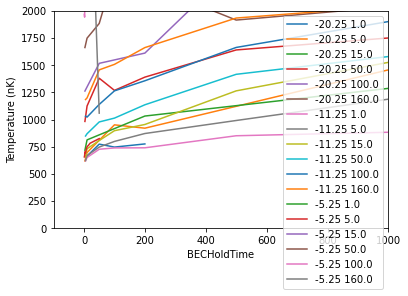

In [63]:
compz = compz_not_lossy
plt.figure()
for latticeDetuning in latticeDetuningList:
    for latticeDepth in latticeDepthList:
        df_temp = getSubDF(df_temperature, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz'], [latticeDepth, latticeDetuning, compz])
        plt.plot(df_temp['BECHoldTime'], df_temp['temperature_nK'], label = str(latticeDetuning)+ " " + str(latticeDepth) )
plt.ylim(0,2000)
plt.xlim(-100,1000)
plt.legend()
plt.xlabel('BECHoldTime')
plt.ylabel('Temperature (nK)')
plt.show()

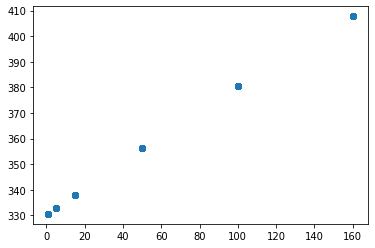

In [64]:
latticeDetuning = -11.25
df_temp = getSubDF(df, ['latticeDetuning_GHz'], [latticeDetuning])
plt.figure()
plt.plot(df_temp['latticeDepth_mW'], df_temp['trapFrequencyX_Hz'], 'o')
plt.show()

In [65]:
beamwaist

5.2e-05

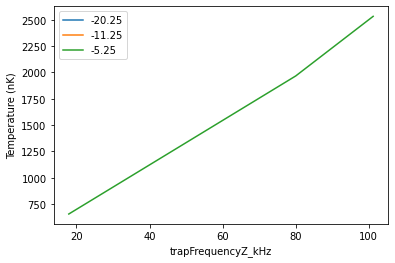

In [66]:
compz = compz_not_lossy
plt.figure()
for latticeDetuning in latticeDetuningList:
    df_temp = getSubDF(df_initial_temperature, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz])
    plt.plot(df_temp['trapFrequencyZ_kHz'], df_temp['temperature_nK'], label = latticeDetuning)
#plt.ylim(0,1000)
#plt.xlim(0,100)
plt.legend()
plt.xlabel('trapFrequencyZ_kHz')
plt.ylabel('Temperature (nK)')
plt.show()

The density is $N/V \simeq N/(2a_z(2a_{\perp})^2) = N/\left(8\sqrt{\hbar/(m\omega_z)}\sqrt{k_B T/m\omega_\perp^2}^{2}\right) = \frac{N m^{3/2}\omega_z^{1/2}\omega_\perp}{8\hbar^{1/2} k_B T} = \frac{N m^{3/2}\omega_z^{5/2}}{8A^2\hbar^{1/2} k_B T}$ with $A = \omega_z / \omega_\perp$ the aspect ratio (A = 162)

More precise calculation would be $P(r,z) = K e^{-\frac{z^2}{2a_z^{2}}} e^{-\frac{\frac{1}{2}m\omega_\perp^2 r^{2}}{k_B T}}$ and normalization condition gives for the N-particle 3D density probability $n(r,z) = \frac{N m \omega_\perp^{2}}{\pi^{3/2}\sqrt{2}a_z k_B T} e^{-\frac{z^2}{2a_z^{2}}} e^{-\frac{\frac{1}{2}m\omega_\perp^2 r^{2}}{k_B T}} = \frac{N m^{3/2} \omega_z^{5/2}}{\pi^{3/2}\sqrt{2}\hbar^{1/2}A^{2} k_B T} e^{-\frac{z^2}{2a_z^{2}}} e^{-\frac{\frac{1}{2}m\omega_\perp^2 r^{2}}{k_B T}}$. And we have $\pi^{3/2}\sqrt{2} = 7.87 \simeq 8$.

Eventually we changed this analysis to take into account the ODT trapping potential and we are keeping $n(r,z) = \frac{N m \omega_\perp^{2}}{\pi^{3/2}\sqrt{2}a_z k_B T} e^{-\frac{z^2}{2a_z^{2}}} e^{-\frac{\frac{1}{2}m\omega_\perp^2 r^{2}}{k_B T}} = \frac{N m^{3/2}\omega_z^{1/2} \omega_\perp^{2}}{\pi^{3/2}\sqrt{2}\hbar^{1/2} k_B T} e^{-\frac{z^2}{2a_z^{2}}} e^{-\frac{\frac{1}{2}m\omega_\perp^2 r^{2}}{k_B T}}$

Note that here the dependance looks to be like $\omega_z^{5/2}$ but there is a dependance hidden in the temperature that should go up like $\omega$, starting from 90-200 Hz in the ODT, up to 2 kHz in the deepest lattice, so there should be a factor of 10 there.

Now we can put units on the 3-body coefficient. WRONG: From the fit we get $\gamma = \beta<n^2>$. And the time unit of the fit is ms.
I keep the mistake here because it caused me some trouble. The real expression is $\beta = \gamma V^2$. Indeed $\frac{dN}{dt} = -\gamma N^3$ for the fit and $\frac{dN}{dt} = -\beta<n^2>N = -\beta/V^2 N^3$. Volume here is understood as the volume of all the pancakes combined.

# Notes from the BEC Calculation


## Temperature and trap frequency

### In BEC

In the BEC the density is like $n(x, y, z) = K e^{-\frac{\frac{1}{2}m(\omega_x^2 x^2 + \omega_y^2 y^2 + \omega_z^2 z^2)}{k_B T}} = N\omega_x\omega_y\omega_z\left(\frac{m}{2\pi k_B T}\right)^{3/2} e^{-\frac{\frac{1}{2}m(\omega_x^2 x^2 + \omega_y^2 y^2 + \omega_z^2 z^2)}{k_B T}} = n_0 e^{-\frac{\frac{1}{2}m(\omega_x^2 x^2 + \omega_y^2 y^2 + \omega_z^2 z^2)}{k_B T}}$

By definition $<n^2> = \int n^2p(x, y, z)d\tau = \frac{1}{N}\int n^3 d\tau = N^2 (\omega_x\omega_y\omega_z)^2\frac{1}{\sqrt{27}}\left(\frac{m}{2\pi k_B T}\right)^3 = \frac{N^2}{\sqrt{27}(2\pi)^3(\sigma_x\sigma_y\sigma_z)^2}$. The differential equation formula is: $\frac{dN}{dt} = -\gamma N^3$ in the fit, but $\frac{dN}{dt} = -\beta <n^2> N$ in reality, so $\frac{dN}{dt} = -\beta \frac{N^2}{\alpha} N$ with $\alpha = 3^{3/2}\left(\frac{2\pi k_B T}{m}\right)^3\frac{1}{(\omega_x\omega_y\omega_z)^2} = 3^{3/2}(2\pi)^3(\sigma_x\sigma_y\sigma_z)^2 = \frac{3^{3/2}}{(n_0/N)^2}$, so $\beta = \gamma\alpha$

### In the lattice

Note: I should use the full calculation of the gaussian wavepacket, in the mean time I can define a fake $\frac{1}{\bar a_z} = \frac{1}{\lambda /2\sqrt{2\pi}} + \frac{1}{a_z}$.
Indeed, for deep lattices, the density is $n(x, y, z) = n_0 e^{-\frac{\frac{1}{2}m(\omega_x^2 x^2 + \omega_y^2 y^2)}{k_B T}}e^{-\frac{z^2}{2a_z^2}}$ and therefore $\boxed{n_0 = \frac{Nm\omega_x\omega_y}{(2\pi)^{3/2}k_B T a_z} = \frac{Nm^{3/2}\omega_x\omega_y\omega_z^{1/2}}{(2\pi)^{3/2}k_B T \sqrt{\hbar}}}$ but in the case of a very weak lattice $a_z$ should saturate to a fixed value. Write the 3D density $n(x, y, z) = n_0 e^{-\frac{\frac{1}{2}m(\omega_x^2 x^2 + \omega_y^2 y^2)}{k_B T}}$ and integrate it on one lattice site $z = -\lambda/4 .. \lambda /4$ gives that $\frac{\lambda}{2} = \sqrt{2\pi a_{z,saturated}^2}$. A good interpolation would be $\frac{1}{\bar a_z} = \frac{1}{\lambda /2\sqrt{2\pi}} + \frac{1}{a_z}$. And it leads to the effective $\bar \omega_z = \left( \sqrt{\omega_z} + \frac{2\sqrt{2\pi}}{\lambda}\sqrt{\frac{\hbar}{m}}\right)^2 = \left( \sqrt{\omega_z} + \frac{2}{\sqrt{\pi}}\sqrt{\frac{E_r}{\hbar}}\right)^2$. The correction at $\omega_z = 0$ is about 2.8 kHz.

Then we again have $<n^2> = n_0^2/\sqrt{27}$ and the local differential equation is $\frac{dn}{dt} = -\beta n^2 n$ which integrated over the volume gives$\int_V \frac{dn}{dt} = \frac{dN}{dt} = -\int_V \beta n^2 n d\tau = -\int_V \beta n^2 Np(\tau) d\tau = -\beta <n(t)^2>N = -\beta\frac{n_0^2\left(\frac{N(t)}{N_0}\right)^2}{\sqrt{27}}N$. So eventually $\boxed{\frac{dN}{dt} =-\beta\frac{n_0^2}{N_0^2\sqrt{27}}N^3} = -\gamma N^3$

## In situ measurement

Other way to calculate the volume, simply use the in situ imaging with the density being $N/V \simeq N/(2a_x 2a_y 2a_z)^2) = \frac{N}{8(7\mu m 7.3\mu m 18\mu m)}$. Actually more precise calculation gives: $n = \frac{N}{(2\pi)^{3/2}\sigma_x\sigma_y\sigma_z}e^{-\frac{1}{2}(\frac{x^2}{\sigma_x^2}+\frac{y^2}{\sigma_y^2}+\frac{z^2}{\sigma_z^2})}$ and therefore $<n^2> = \frac{1}{N}\int n^3 d\tau = \frac{N^2}{3^{3/2}(2\pi)^3(\sigma_x\sigma_y\sigma_z)^2}$.

In [67]:
def effectiveOmegaZ(omega):
    return (np.sqrt(omega)+2*np.sqrt(2*np.pi*hbar/m)/(741*nm))**2

results['effectiveTrapFrequencyZ_kHz'] = effectiveOmegaZ(results['trapFrequencyZ_kHz']*kHz)/kHz

In [68]:
#numberOfPancakes_fromBEC = 40 # for ODT Prefactor of 1
#numberOfPancakes = numberOfPancakes_fromBEC/np.sqrt(np.maximum(results['ODTFactor'], 1))
numberOfPancakes = 40


temperature_nK = 600
prefactor = (m/(2*np.pi))**(3/2)/(k_B*np.sqrt(hbar))
# I assume here 400 nK, but eventually we should do a proper thermometry of the initial cloud.

#results['density'] = results['N0']/numberOfPancakes*prefactor*(2*np.pi*results['trapFrequency']*10**3)**(5/2)/(temperature_nK*10**(-9))*10**(-6)  # in atoms / cm3
trapFrequenciesProduct = (results['effectiveTrapFrequencyZ_kHz']*kHz)**(1/2)*results['trapFrequencyX_Hz']*Hz*results['trapFrequencyY_Hz']*Hz

# MODIFY THE NUMBER OF PANCAKES HERE
results['density_constantT'] = results['N0']/numberOfPancakes*prefactor/(temperature_nK*nK)*trapFrequenciesProduct*cm3  # in atoms / cm3

In [69]:
results['beta_constantT'] = results['gamma']/ms  * results['N0']**2 * np.sqrt(27) / results['density_constantT']**2 # this is is cm^6/s

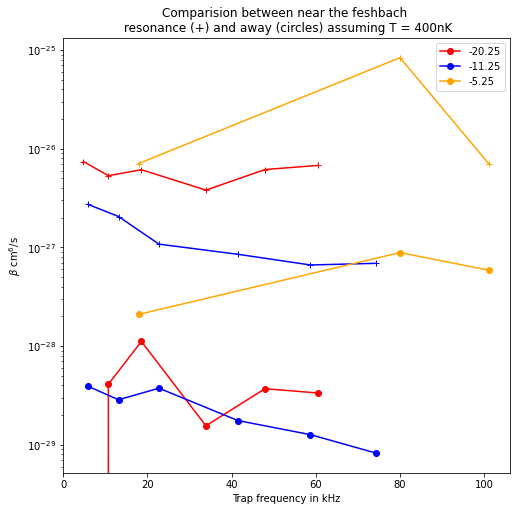

In [70]:
plt.figure(figsize = (8, 8))
i = 0
for latticeDetuning in latticeDetuningList:
    decay_notlossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_not_lossy])
    decay_lossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_lossy])
    plt.semilogy(decay_notlossy['trapFrequencyZ_kHz'], decay_notlossy['beta_constantT'], color = colors[i], marker = 'o', label = latticeDetuning)
    plt.semilogy(decay_lossy['trapFrequencyZ_kHz'], decay_lossy['beta_constantT'], color = colors[i], marker = '+')
    i += 1
plt.legend()
#plt.xlim(0,20)
plt.xlabel('Trap frequency in kHz')
plt.ylabel(r'$\beta$ cm$^6/$s')
plt.title('Comparision between near the feshbach \n resonance (+) and away (circles) assuming T = 400nK')
plt.savefig('beta_coef.jpg', dpi = 300, transparent = False)
plt.show()

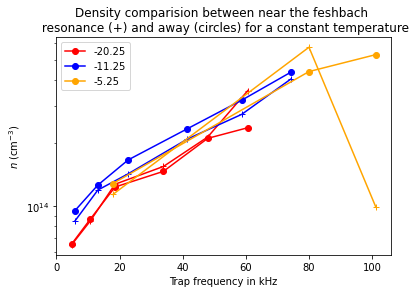

In [71]:
plt.figure()
i = 0

for latticeDetuning in latticeDetuningList:
    decay_notlossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_not_lossy])
    decay_lossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_lossy])
    plt.semilogy(decay_notlossy['trapFrequencyZ_kHz'], decay_notlossy['density_constantT'], color = colors[i], marker = 'o', label = latticeDetuning)
    plt.semilogy(decay_lossy['trapFrequencyZ_kHz'], decay_lossy['density_constantT'], color = colors[i], marker = '+')
    i += 1
plt.legend()
#plt.xlim(0,20)
plt.xlabel('Trap frequency in kHz')
plt.ylabel(r'$n$ (cm$^{-3}$)')
plt.title('Density comparision between near the feshbach \n resonance (+) and away (circles) for a constant temperature')
plt.savefig('density.jpg', dpi = 300, transparent = False)
plt.show()

We can also do the version where we take the initial temperature of each run

## With temperature measurements

In [72]:
results['density_temperature'] = results['N0']/numberOfPancakes*prefactor/(results['temperature_nK']*nK)*trapFrequenciesProduct*cm3  # in atoms / cm3
results['beta_temperature'] = results['gamma']/ms* results['N0']**2 * np.sqrt(27) / results['density_temperature']**2    # this is is cm^6/s
#results['beta_temperature_limit'] = 2*18/(results['N0']**3)* results['N0']**2 * np.sqrt(27) / results['density_temperature']**2
# gamma = 2b/N0**3 and I plugged 18 s-1 as the vacuum limit. Why did I write that?
results['beta_temperature_limit'] = (1/50)*np.sqrt(27)/results['density_temperature']**2 
# at initial time -b = 1/(18 seconds) = -beta*<n^2> = -beta*n^2/sqrt(27)

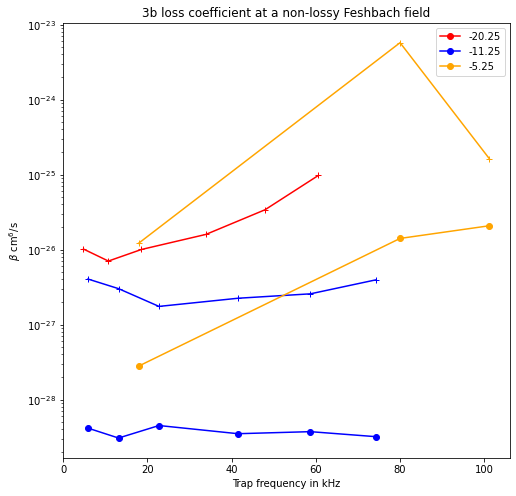

In [73]:
plt.figure(figsize = (8,8))
i = 0

for latticeDetuning in latticeDetuningList:
    decay_notlossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_not_lossy])
    decay_lossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_lossy])
    if not (decay_lossy.empty and decay_notlossy.empty):
        plt.semilogy(decay_notlossy['trapFrequencyZ_kHz'], decay_notlossy['beta_temperature'], color = colors[i], marker = 'o', label = latticeDetuning)
        plt.semilogy(decay_lossy['trapFrequencyZ_kHz'], decay_lossy['beta_temperature'], color = colors[i], marker = '+')
        #plt.semilogy(decay_notlossy['trapFrequencyZ_kHz'], decay_notlossy['beta_temperature_limit'], 'o', color = 'steelblue', label = "vacuum limit not lossy")
        #plt.semilogy(decay_lossy['trapFrequencyZ_kHz'], decay_lossy['beta_temperature_limit'], '+', color = 'steelblue', label = "vacuum limit lossy")
    i += 1
plt.legend()
#plt.xlim(0,20)
plt.xlabel('Trap frequency in kHz')
plt.ylabel(r'$\beta$ cm$^6/$s')
#plt.title('Comparision between near the feshbach \n resonance (+) and away (circles) with the initial temperature')
plt.title('3b loss coefficient at a non-lossy Feshbach field')
plt.show()

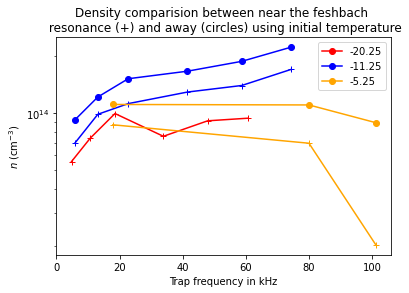

In [74]:
plt.figure()
i = 0

for latticeDetuning in latticeDetuningList:
    decay_notlossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_not_lossy])
    decay_lossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_lossy])
    plt.semilogy(decay_notlossy['trapFrequencyZ_kHz'], decay_notlossy['density_temperature'], color = colors[i], marker = 'o', label = latticeDetuning)
    plt.semilogy(decay_lossy['trapFrequencyZ_kHz'], decay_lossy['density_temperature'], color = colors[i], marker = '+')
    i += 1
plt.legend()
#plt.xlim(0,20)
plt.xlabel('Trap frequency in kHz')
plt.ylabel(r'$n$ (cm$^{-3}$)')
plt.title('Density comparision between near the feshbach \n resonance (+) and away (circles) using initial temperature')
plt.savefig('density.jpg', dpi = 300, transparent = False)
plt.show()

In [46]:
results.head()

,N0,alpha,gamma,b,TOF,latticeDepth_mW,latticeDetuning_GHz,compz,ODT3_Comp_final,ODT12_pre_lattice,...,xWidth,yWidth,imageID,temperature_nK,effectiveTrapFrequencyZ_kHz,density_constantT,beta_constantT,density_temperature,beta_temperature,beta_temperature_limit
0,29689.223854,NaN,-2.799154e-13,NaN,5.0,1.0,-20.25,7.4,5.0,0.5,...,NaN,NaN,NaN,NaN,14.972980,6.564602e+13,-2.975017e-28,NaN,NaN,NaN
1,30069.835138,NaN,6.534743e-14,NaN,5.0,5.0,-20.25,7.4,5.0,0.5,...,NaN,NaN,NaN,NaN,24.542901,8.643066e+13,4.109952e-29,NaN,NaN,NaN
2,34156.463831,NaN,2.789113e-13,NaN,5.0,15.0,-20.25,7.4,5.0,0.5,...,NaN,NaN,NaN,NaN,35.867463,1.231519e+14,1.114837e-28,NaN,NaN,NaN
3,28796.437940,NaN,7.747112e-14,NaN,5.0,50.0,-20.25,7.4,5.0,0.5,...,NaN,NaN,NaN,NaN,56.283955,1.463624e+14,1.558261e-29,NaN,NaN,NaN
4,31233.760363,NaN,3.238554e-13,NaN,5.0,100.0,-20.25,7.4,5.0,0.5,...,NaN,NaN,NaN,NaN,74.026848,2.105080e+14,3.704626e-29,NaN,NaN,NaN


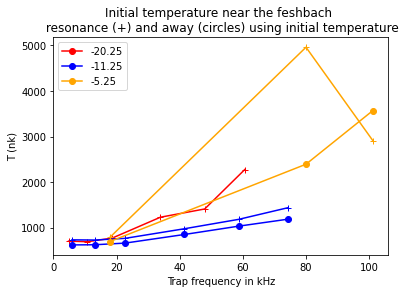

In [47]:
plt.figure()
i = 0

for latticeDetuning in latticeDetuningList:
    decay_notlossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_not_lossy])
    decay_lossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_lossy])
    plt.plot(decay_notlossy['trapFrequencyZ_kHz'], decay_notlossy['temperature_nK'], color = colors[i], marker = 'o', label = latticeDetuning)
    plt.plot(decay_lossy['trapFrequencyZ_kHz'], decay_lossy['temperature_nK'], color = colors[i], marker = '+')
    i += 1
plt.legend()
#plt.ylim(0, 1000)
#plt.xlim(0,20)
plt.xlabel('Trap frequency in kHz')
plt.ylabel(r'T (nk)')
plt.title('Initial temperature near the feshbach \n resonance (+) and away (circles) using initial temperature')
plt.savefig('density.jpg', dpi = 300, transparent = False)
plt.show()

In [48]:
latticeDepthList

array([  1.,   5.,  15.,  50., 100., 160.])

In [49]:
results.columns

Index(['N0', 'alpha', 'gamma', 'b', 'TOF', 'latticeDepth_mW',
       'latticeDetuning_GHz', 'compz', 'ODT3_Comp_final', 'ODT12_pre_lattice',
       'ODT3_pre_lattice', 'nCount', 'xPos', 'yPos', 'isotope',
       'xWidth_TOF_h_um', 'zWidth_TOF_h_um', 'trapFrequencyZ_kHz',
       'deconfiningTrapFrequency_Hz', 'bareTrapFrequencyX_Hz',
       'bareTrapFrequencyY_Hz', 'bareTrapFrequencyZ_Hz', 'trapFrequencyX_Hz',
       'trapFrequencyY_Hz', 'BECHoldTime', 'dummy', 'xWidth', 'yWidth',
       'imageID', 'temperature_nK', 'effectiveTrapFrequencyZ_kHz',
       'density_constantT', 'beta_constantT', 'density_temperature',
       'beta_temperature', 'beta_temperature_limit'],
      dtype='object')

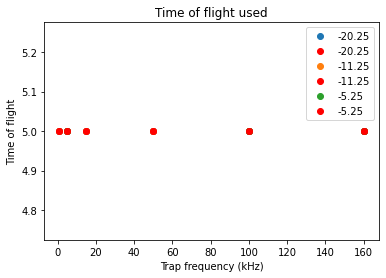

In [50]:
# Plot of the time constant
plt.figure()
for latticeDetuning in latticeDetuningList:
    results_temp = getSubDF(resultsDF_pure, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_lossy])
    plt.plot(results_temp['latticeDepth_mW'], results_temp['TOF'], 'o', label = latticeDetuning)
    results_temp = getSubDF(resultsDF_pure, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_not_lossy])
    plt.plot(results_temp['latticeDepth_mW'], results_temp['TOF'], 'o', label = latticeDetuning, color = 'red')
plt.legend()
plt.title('Time of flight used')
plt.xlabel('Trap frequency (kHz)')
plt.ylabel('Time of flight')
#plt.ylim(0,80)
plt.show()

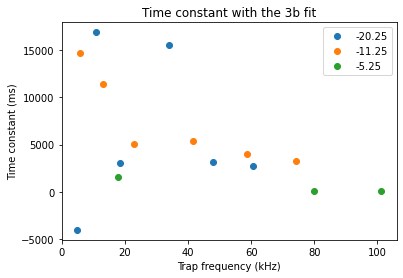

In [51]:
# Plot of the time constant
plt.figure()
for latticeDetuning in latticeDetuningList:
    results_temp = getSubDF(resultsDF_pure, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_not_lossy])
    plt.plot(results_temp['trapFrequencyZ_kHz'], 1/(results_temp['N0']**2*results_temp['gamma']), 'o', label = latticeDetuning)
plt.legend()
plt.title('Time constant with the 3b fit')
plt.xlabel('Trap frequency (kHz)')
plt.ylabel('Time constant (ms)')
#plt.ylim(0,80)
plt.show()

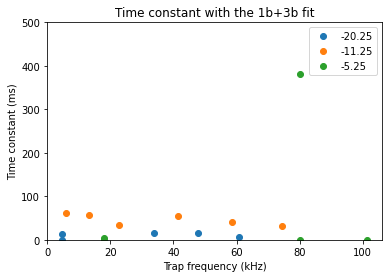

In [52]:
# Plot of the time constant
plt.figure()
for latticeDetuning in latticeDetuningList:
    results_temp = getSubDF(resultsDF_mix, ['latticeDetuning_GHz'], [latticeDetuning])
    plt.plot(results_temp['trapFrequencyZ_kHz'], 1/(results_temp['N0']**2*results_temp['gamma']), 'o', label = latticeDetuning)
plt.legend()
plt.title('Time constant with the 1b+3b fit')
plt.xlabel('Trap frequency (kHz)')
plt.ylabel('Time constant (ms)')
plt.ylim(0,500)
plt.show()

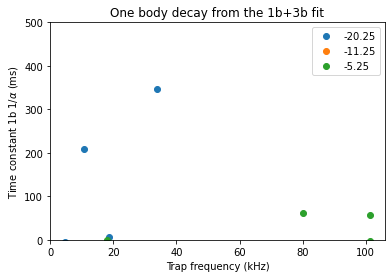

In [53]:
# Plot of the time constant
plt.figure()
for latticeDetuning in latticeDetuningList:
    results_temp = getSubDF(resultsDF_mix, ['latticeDetuning_GHz'], [latticeDetuning])
    plt.plot(results_temp['trapFrequencyZ_kHz'], 1/results_temp['alpha'], 'o', label = latticeDetuning)
plt.legend()
plt.title('One body decay from the 1b+3b fit')
plt.xlabel('Trap frequency (kHz)')
plt.ylabel(r'Time constant 1b $1/\alpha$ (ms)')
plt.ylim(0,500)
plt.show()

Adiabatic criterion. What is the real one?

Blue case: the smallest radial trap frequencies are about 200Hz with ODT3Comp = 5. Which means about 0.5ms should be fine and still adiabatic for the $z$ direction (starts at 3kHz). This trap frequency remains in the vicinity and might diminish to ~100Hz. It's best to be too fast than too slow in order not to change the temperature measurement.

Red case: smallest depends on the ODTFactor, but taking -20GHz and 0.2mW with ODTFactor = 4 we have 140Hz in X and 60Hz in Y. Agains starting at 0.5ms sounds good. -1GHz 120mW will be closer to 2kHz trap frequency while the Z is 300kHz, so 10 $\mu$s is good there.

A good formula would be $500\mu$s constant in the blue case and then noticing that $100$mW and -2GHz gives about 240kHz trap frequency, which is suitable for 10$\mu$s ramping time, then something that goes inversly propotionnal to $\sqrt{\frac{P/100}{\Delta/2}}$ is good. You want to saturate at 500$\mu$s at 0 power so:
\[\tau = max\left(\frac{10 \mu s}{\frac{10}{500} + \sqrt{\frac{P/100}{\Delta/2}}}, 10\mu s\right)\]

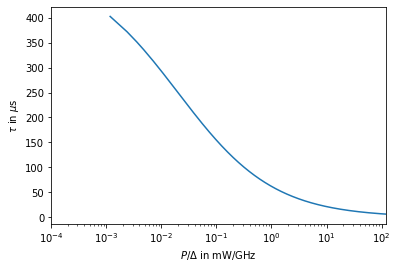

In [54]:
X = np.linspace(0.1/85, 120, 100000)   # X = P/Delta
Y = 10/(10/500+np.sqrt(X/50))
plt.figure()
plt.semilogx(X, Y)
plt.ylabel(r'$\tau$ in $\mu$s')
plt.xlabel(r'$P/\Delta$ in mW/GHz')
plt.xlim(0.0001, 120)
plt.show()

## Temperature plots

In [55]:
latticeDepth = 1
latticeDetuning = -11.25
compz = compz_not_lossy
df_tempZ = getSubDF(df, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz'], [latticeDepth, latticeDetuning, compz])
time = np.linspace(0, 3000, 10000)

In [56]:
df_tempZ[['nCount', 'temperature_nK', 'BECHoldTime']]

,nCount,temperature_nK,BECHoldTime
0,32280.0,577.253969,5.0
1,31699.0,1217.277305,5000.0
2,42147.0,677.229861,10.0
3,40154.0,592.122852,5.0
4,39914.0,836.242918,1000.0
5,40602.0,739.760685,100.0
6,39860.0,747.472968,200.0
7,30707.0,1237.361041,5000.0
8,44657.0,749.629182,200.0
9,35404.0,1150.856543,3000.0


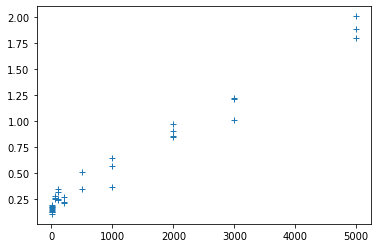

In [57]:
plt.figure()
plt.plot(df_tempZ['BECHoldTime'], df_tempZ['temperature_nK']**3/df_tempZ['nCount']**2, '+')
# I should actually correct for the density
plt.show()

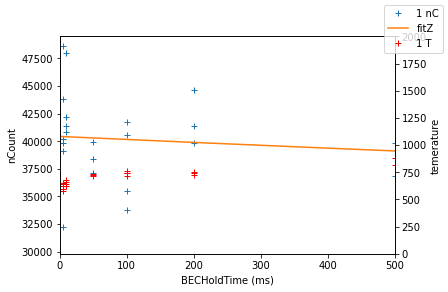

"\n# Create some mock data\nt = np.arange(0.01, 10.0, 0.01)\ndata1 = np.exp(t)\ndata2 = np.sin(2 * np.pi * t)\n\n\ncolor = 'tab:red'\nax1.set_xlabel('time (s)')\nax1.set_ylabel('exp', color=color)\nax1.plot(t, data1, color=color)\nax1.tick_params(axis='y', labelcolor=color)\n\nax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis\n\ncolor = 'tab:blue'\nax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1\nax2.plot(t, data2, color=color)\nax2.tick_params(axis='y', labelcolor=color)\n\nfig.tight_layout()  # otherwise the right y-label is slightly clipped\nplt.show()"

In [58]:
resultZ = getSubDF(resultsDF_pure, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz'], [latticeDepth, latticeDetuning, compz])

NZ, gammaZ = resultZ[['N0', 'gamma']].iloc[0,:]
Z = N_polarized_pure3b(time, NZ, gammaZ)

fig, ax1 = plt.subplots()
ax1.set_xlabel('BECHoldTime (ms)')
ax1.set_ylabel('nCount')
ax1.plot(df_tempZ['BECHoldTime'], df_tempZ['nCount'], '+', label = str(round(latticeDepth, 2)) + " nC")
ax1.plot(time, Z, '-', label = 'fitZ')
ax1.set_xlim(0,500)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('temerature')  # we already handled the x-label with ax1
ax2.plot(df_tempZ['BECHoldTime'], df_tempZ['temperature_nK'], '+', color = 'red', label = str(round(latticeDepth, 2)) + ' T')
ax2.set_ylim(0,2000)
fig.legend()
#fig.tight_layout()
#plt.ylim(0, 20000)
#plt.xlim(0,10)

plt.show()

"""
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)


color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()"""

In [59]:
df_tempZ[df_tempZ['temperature_nK'] < 250].iloc[:,10:35]

,xWidth,yWidth,xPos,yPos,imageID,isotope,run,xWidth_TOF_h_um,zWidth_TOF_h_um,trapFrequencyZ_kHz,deconfiningTrapFrequency_Hz,bareTrapFrequencyX_Hz,bareTrapFrequencyY_Hz,bareTrapFrequencyZ_Hz,trapFrequencyX_Hz,trapFrequencyY_Hz,temperature_nK


Calculate the velocity to temperature conversion. Here $\sigma = \sqrt{\sigma_0^{2}+(\sigma_{v}t)^{2}}$ is fitted from a gaussian distribution $\exp(-\frac{1}{2}\frac{x^{2}}{\sigma^{2}})$ where $x = vt$, so $v$ is distributed like a gaussian with width $\sigma_{v}$ which is the result of the fit $P(v) \sim \exp(-\frac{1}{2}\frac{v^{2}}{\sigma_{v}^{2}}) \sim \exp(-\frac{\frac{1}{2}mv^{2}}{k_{B}T})$. Therefore we find:
\[ \sigma_{v} = \sqrt{\frac{k_{B}T}{m}}\]

In [60]:
m_Dy = 164*1.66*10**(-27)
k_B = 1.38*10**(-23)
#pixel_size = 6.5*10**(-6)   ### Define that globally
tof_unit = 10**(-3)
#magnification = 3
resultsDF_sigma['temperature_Z'] = m_Dy*(resultsDF_sigma['v_Z']*pixel_size/magnification/tof_unit)**2/k_B
resultsDF_sigma['temperature_trans'] = m_Dy*(resultsDF_sigma['v_trans']*pixel_size/magnification/tof_unit)**2/k_B
resultsDF_sigma

NameError: name 'resultsDF_sigma' is not defined